In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
% matplotlib inline


In [86]:
df = pd.read_csv("course_page_actions.csv")
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [96]:
df.query("id == 802405")['duration'].mean()

141.3400410241581

In [101]:
df.query("id == 678491")['duration']

604    153.951462
605           NaN
Name: duration, dtype: float64

In [105]:
df.query("id == 757165")

,timestamp,id,group,action,duration
366,2016-10-03 20:07:33.086643,757165,control,view,139.133147
367,2016-10-03 20:08:57.011373,757165,control,enroll,NaN


In [106]:
control = df.query("group == 'control'")

In [113]:
control.groupby('id')['duration'].mean().mean()

115.40710650582048

In [114]:
exper = df.query("group != 'control'")

In [116]:
exper.groupby('id')['duration'].mean().mean() - control.groupby('id')['duration'].mean().mean()

15.489975679097256

In [84]:
df.query("group != 'control'")['duration'].mean()

130.89708218491774

In [122]:
exper['duration'].mean() - control.dropna()['duration'].mean()

15.525098619574493

In [44]:
df.query("group != 'control'&").groupby('id')['duration'].mean().mean() - df.query("group == 'control'& action == 'view'").groupby('id')['duration'].mean().mean()

15.934470040395013

In [50]:
df.query("id == 507587")

,timestamp,id,group,action,duration
3504,2017-01-02 11:33:47.443869,507587,experiment,view,152.794056
3505,2017-01-02 11:33:50.924989,507587,experiment,enroll,152.794056


In [52]:
views = df.query("action == 'view'")

In [54]:
control = views.query("group == 'control'")

In [55]:
exper = views.query("group != 'control'")

In [63]:
exper['duration'].mean() - control['duration'].mean()

16.004498154952316

In [41]:
pop_mean_diff=experiment-control
pop_mean_diff
#lets to chack if it significance 

15.489975679097256

In [47]:
#bootstrap sample
sample=df.sample(df.shape[0],replace=True)
diffs=[]
for _ in range(10000):
    sample=df.sample(df.shape[0],replace=True)
    viewss1=sample.groupby(['id','group'])['duration'].mean().reset_index()
    experiment1=sample[sample['group']=='experiment']['duration'].mean()
    control1=sample[sample['group']=='control']['duration'].mean()
    diffs.append(experiment1-control1)

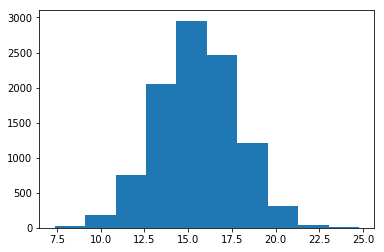

In [48]:
plt.hist(diffs);

In [ ]:
np.std(diffs)

In [71]:
vals=np.random.normal(0,np.std(diffs),np.size(diffs))

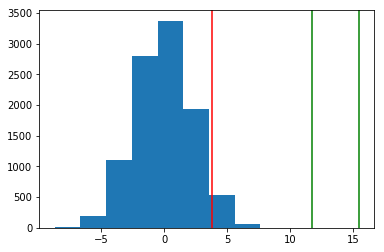

In [72]:
plt.hist(vals)
plt.axvline(np.percentile(vals,95),color='red')
plt.axvline(np.percentile(vals,100-((vals>pop_mean_diff).mean()*100)),color='green')
plt.axvline(pop_mean_diff,color='green')


In [73]:
#alpha
(vals>pop_mean_diff).mean()


0.0